In [1]:
#Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
#Read dataframe from preprocessing
data = pd.read_csv("Output/frame.csv",index_col=None, header=0,low_memory=False)
df = pd.DataFrame(data)

In [3]:
#Convert publish date to Timestamp
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [4]:
#Add time period column for analysis points of interest
before = (df['publish_date'] > pd.to_datetime('6/30/2015')) & (df['publish_date'] <= pd.to_datetime('3/1/2016')) 
during = (df['publish_date'] > pd.to_datetime('3/1/2016'))  & (df['publish_date'] <= pd.to_datetime('12/1/2016'))
after = (df['publish_date'] > pd.to_datetime('12/1/2016')) & (df['publish_date'] <= pd.to_datetime('6/30/2017'))
df.loc[before, "time_period"] = 'Pre-election'
df.loc[during, "time_period"] = 'Election season'
df.loc[after, "time_period"] = 'Post-election'

In [5]:
#Wish to strip the tweets from outside of our range of interest from the dataframe
df = df.dropna()
#dropna removes tweets that did not have a define region and those that were outside of the time period of interest

In [6]:
#Separate tweets that are english and non-english into their own dataframes
df_eng = pd.DataFrame(df.loc[df['language']== 'English'])
df_not_eng = pd.DataFrame(df.loc[df['language'] != 'English'])
num_eng = df_eng.count()[0]
num_not_eng = df_not_eng.count()[0]
print(f'The number of tweets in English were {num_eng}')
print(f'The number of tweets that were not in English were {num_not_eng}')

The number of tweets in English were 1641375
The number of tweets that were not in English were 744448


In [7]:
#Reset the index
df_eng = df_eng.reset_index(drop=True)

In [8]:
#Select account types of interest
right = df_eng['account_category'] == 'RightTroll'
left = df_eng['account_category'] == 'LeftTroll'
news = df_eng['account_category'] == 'NewsFeed'
hashtag = df_eng['account_category'] == 'HashtagGamer'
fearmonger = df_eng['account_category'] == 'Fearmonger'
df_troll = pd.DataFrame(df_eng.loc[right | left | news | hashtag | fearmonger])

In [32]:
#Reset the index
df_troll = df_troll.reset_index(drop=True)
Troll_tweets = df_troll['account_category'].value_counts()
df_troll['account_category'].value_counts()

NewsFeed        531541
RightTroll      387238
LeftTroll       367978
HashtagGamer    210177
Fearmonger        9858
Name: account_category, dtype: int64

In [37]:
#Find logical index of each category for .loc
right = df_troll['account_category'] == 'RightTroll'
left = df_troll['account_category'] == 'LeftTroll'
news = df_troll['account_category'] == 'NewsFeed'
hashtag = df_troll['account_category'] == 'HashtagGamer'
fearmonger = df_troll['account_category'] == 'Fearmonger'

troll_fear = pd.DataFrame(df_troll.loc[fearmonger])
troll_fear = troll_fear.reset_index(drop=True)

troll_hashtag = pd.DataFrame(df_troll.loc[hashtag])
troll_hashtag = troll_hashtag.reset_index(drop=True)

troll_news = pd.DataFrame(df_troll.loc[news])
troll_news = troll_news.reset_index(drop=True)

troll_left = pd.DataFrame(df_troll.loc[left])
troll_left = troll_left.reset_index(drop=True)

troll_right = pd.DataFrame(df_troll.loc[right])
troll_right = troll_right.reset_index(drop=True)

In [53]:
#find number of authors for each category
fear_nauthors = troll_fear['author'].nunique()
hashtag_nauthors = troll_hashtag['author'].nunique()
news_nauthors = troll_news['author'].nunique()
left_nauthors = troll_left['author'].nunique()
right_nauthors = troll_right['author'].nunique()
print(f"The number of fearmongers was {fear_nauthors}.\nThe number of hashtagers was {hashtag_nauthors}. \
\nThe number of news linkers was {news_nauthors}.\nThe number of left trolls was {left_nauthors}.\
\nThe number of right trolls was {right_nauthors}")

The number of fearmongers was 121.
The number of hashtagers was 111. 
The number of news linkers was 53.
The number of left trolls was 224.
The number of right trolls was 424


In [57]:
#Find the number of authors for each category
fear_ntweets = troll_fear['author'].count()
hashtag_ntweets = troll_hashtag['author'].count()
news_ntweets = troll_news['author'].count()
left_ntweets = troll_left['author'].count()
right_ntweets = troll_right['author'].count()
print(f"There were {fear_ntweets} fearmonger account tweets. \
\nThere were {hashtag_ntweets} hashtag account tweets. \
\nThere were {news_ntweets} news account tweets. \
\nThere were {left_ntweets} left account tweets. \
\nThere were {right_ntweets} right account tweets.")

There were 9858 fearmonger account tweets. 
There were 210177 hashtag account tweets. 
There were 531541 news account tweets. 
There were 367978 left account tweets. 
There were 387238 right account tweets.


In [101]:
df_box = pd.DataFrame(df_troll.groupby(['author','account_category']).count()['external_author_id'])
df_box = df_box.reset_index()
df_box = df_box.rename(columns={'author':'Author',
                                'account_category':'Account Type',
                                'external_author_id':'Number of Tweets'
                               })
df_box.head()

,Author,Account Type,Number of Tweets
0,1D_NICOLE_,Fearmonger,6
1,1ERIK_LEE,RightTroll,2
2,2NDHALFONION,RightTroll,3
3,4EVER_SUSAN,RightTroll,62
4,4MYSQUAD,LeftTroll,4767


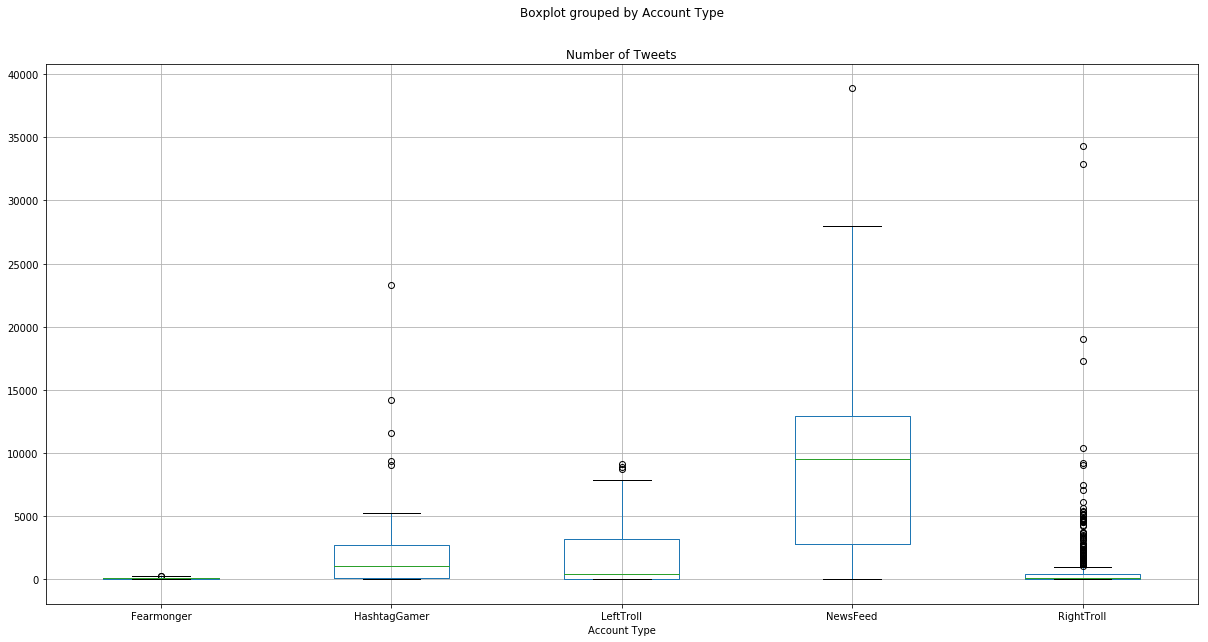

In [102]:
# Create a boxplot to compare means
df_box.boxplot("Number of Tweets", by="Account Type", figsize=(20, 10))

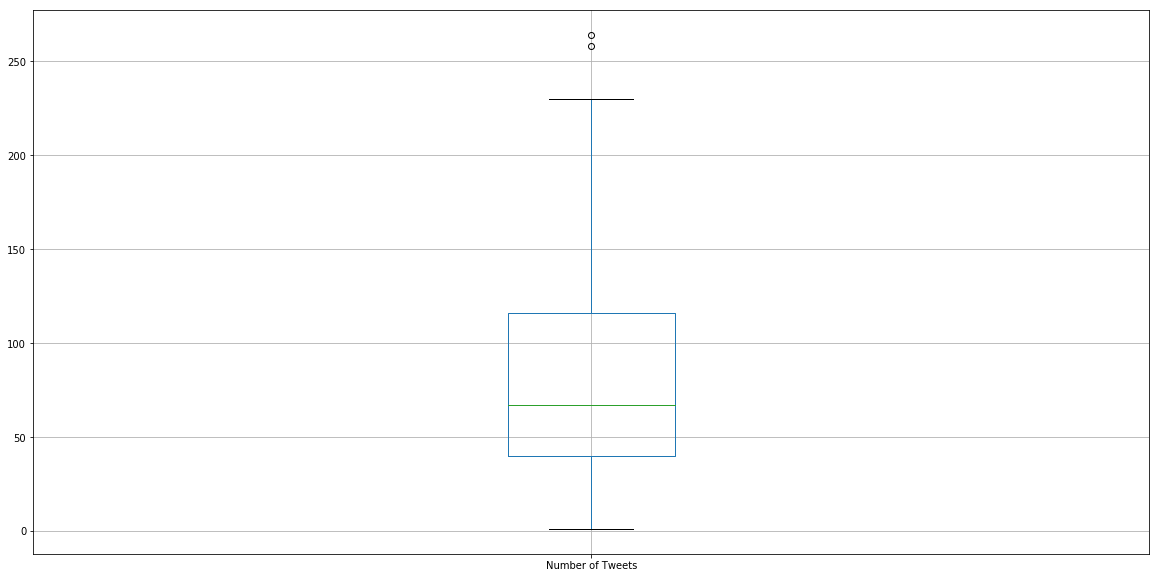

In [107]:
# Create a boxplot to compare means
df_box.loc[df_box['Account Type'] == 'Fearmonger'].boxplot("Number of Tweets", figsize=(20, 10))

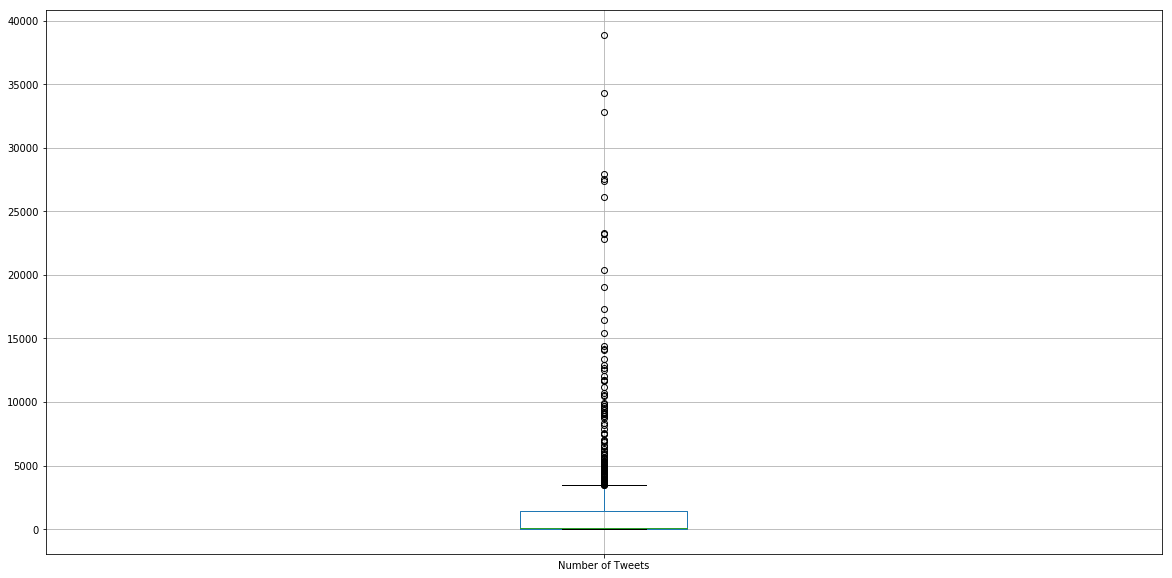

In [106]:
# Create a boxplot to compare means
df_box.boxplot("Number of Tweets", figsize=(20, 10))